## Mask Overlays Tutorial

In this tutorial, we will visualize slices of an example CT dataset and overlay the masks on the CT images.

In [1]:
import h5py
import os
import matplotlib.pyplot as plt

In [2]:
# change to location of downloaded dataset
hdf5_dir = "/data/ssahin/RCC_DL/multiphase/hdf5_dir"

# pick a single file for the purposes of this tutorial
filepath = os.path.join(hdf5_dir,"Zz99Ji2swU.hdf5")

# print HDF5 contents
with h5py.File(filepath, "r") as hdf:
    print(f"HDF5 file containers: {list(hdf.keys())}")
    print(f"HDF5 file attributes: {list(hdf.attrs.keys())}")

HDF5 file containers: ['arterial', 'delay', 'mask', 'noncon', 'portven']
HDF5 file attributes: ['Manufacturer', 'PID', 'Patient Age', 'Patient Sex', 'arterial_pixdim', 'delay_pixdim', 'mask_pixdim', 'noncon_pixdim', 'pathology', 'pathology_grade', 'portven_pixdim', 'tumor_type']


In [3]:
with h5py.File(filepath, "r") as hdf:
    noncon = hdf["noncon"][:]
    arterial = hdf["arterial"][:]
    mask = hdf["mask"][:]

print(f"noncon size: {noncon.shape}")
print(f"arterial size: {arterial.shape}")
print(f"mask size: {mask.shape}")

noncon size: (512, 512, 49)
arterial size: (512, 512, 49)
mask size: (512, 512, 49)


In [4]:
# find mask slices that include tumor
sl_idx = [sl for sl in range(mask.shape[2]) 
          if mask[:,:,sl].any()]
print(f"Slice indices with tumor: {sl_idx}")

Slice indices with tumor: [5, 6, 7, 8]


In [9]:
def plot_slices(data, slices):
    num_plots = len(slices)
    fig, axs = plt.subplots(figsize=(4*num_plots,4), ncols=num_plots, nrows=1)
    for i, sl in enumerate(slices):
        axs[i].imshow(data[:,:,sl], cmap="Greys_r", 
                      interpolation='none', vmin=-200, vmax=800)
        axs[i].axis('off')
    plt.show()

Noncon:


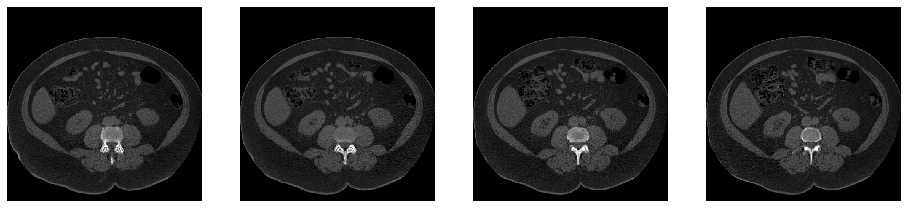

Arterial:


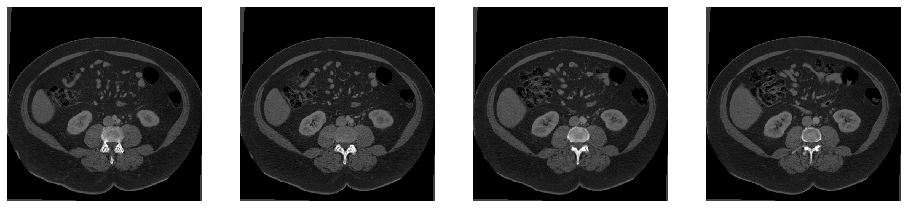

In [11]:
print("Noncon:")
plot_slices(noncon, sl_idx)
print("Arterial:")
plot_slices(arterial, sl_idx)